## Test 1. My first data science project

### In this lab you will apply the concepts and techniques developed in previous sessions. You are expected to work on the assignments on your own DURING the duration of the lab.

### You are expected to submit the code developed as well as a brief description of your findings and insights.

### This lab represents 30% of the total marking of the module¶

TO DO: Description of the challenge

### Let's load and install some libraries

In [1]:
!pip install py-openaq

In [2]:
import pandas as pd
import seaborn as sns
import openaq
import matplotlib as mpl
import matplotlib.pyplot as plt
# addition
import numpy as np

### Let's load the dataset

In [3]:
airQualityCities=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458_OLD/master/data/airQualityCities.csv')

In [4]:
airQualityCities.sample(5)

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
28615,2021-09-29 18:00:00,"Aya Nagar, Delhi - IMD",no2,17.90,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 12:30:00+00:00,28.470691,77.109936
36691,2021-09-28 21:15:00,"Sirifort, Delhi - CPCB",o3,23.70,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 15:45:00+00:00,28.550425,77.215938
2597,2021-10-10 18:00:00,FR04012,no2,50.00,b'\xc2\xb5g/m\xc2\xb3',FR,Paris,2021-10-10 16:00:00+00:00,48.827782,2.327499
34562,2021-09-29 02:30:00,"Wazirpur, Delhi - DPCC",pm10,130.00,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 21:00:00+00:00,28.699793,77.165453
14069,2021-10-03 04:00:00,DEBE063,no2,11.99,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2021-10-03 02:00:00+00:00,52.467534,13.441654


In [5]:
airQualityCities.head()

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
0,2021-10-12 23:00:00,US Diplomatic Post: New Delhi,pm25,-999.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-10-12 17:30:00+00:00,28.635760,77.224450
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
3,2021-10-12 18:00:00,Tower Hamlets Roadside,no2,36.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.522530,-0.042155
4,2021-10-12 18:00:00,London Eltham,no2,15.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766


In [6]:
airQualityCities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37087 entries, 0 to 37086
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date.local             37087 non-null  object 
 1   location               37087 non-null  object 
 2   parameter              37087 non-null  object 
 3   value                  37087 non-null  float64
 4   unit                   37087 non-null  object 
 5   country                37087 non-null  object 
 6   city                   37087 non-null  object 
 7   date.utc               37087 non-null  object 
 8   coordinates.latitude   37087 non-null  float64
 9   coordinates.longitude  37087 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.8+ MB


In [7]:
airQualityCities.groupby('city').count()

,date.local,location,parameter,value,unit,country,date.utc,coordinates.latitude,coordinates.longitude
city,,,,,,,,,
Beijing,300,300,300,300,300,300,300,300,300
Berlin,2248,2248,2248,2248,2248,2248,2248,2248,2248
Delhi,16265,16265,16265,16265,16265,16265,16265,16265,16265
London,5772,5772,5772,5772,5772,5772,5772,5772,5772
Madrid,7400,7400,7400,7400,7400,7400,7400,7400,7400
Paris,5102,5102,5102,5102,5102,5102,5102,5102,5102


In [8]:
airQualityCities.groupby('parameter').count()

,date.local,location,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
parameter,,,,,,,,,
co,3248,3248,3248,3248,3248,3248,3248,3248,3248
no2,10417,10417,10417,10417,10417,10417,10417,10417,10417
o3,7401,7401,7401,7401,7401,7401,7401,7401,7401
pm10,7206,7206,7206,7206,7206,7206,7206,7206,7206
pm25,5783,5783,5783,5783,5783,5783,5783,5783,5783
so2,3032,3032,3032,3032,3032,3032,3032,3032,3032


In [9]:
airQualityCities.pivot_table(values='value', index=('parameter','city')).sort_values(by=['parameter','value'])

value
parameter city               
co        Berlin   267.555556
          Madrid   360.816327
          Delhi    984.832721
no2       Berlin    16.033369
          London    18.745915
          Delhi     21.598024
          Madrid    23.337947
          Paris     34.055988
o3        Berlin    14.868796
          Delhi     24.051291
          London    36.179387
          Paris     41.492475
          Madrid    44.216649
pm10      London    12.079461
          Madrid    14.466007
          Berlin    18.440835
          Paris     21.637607
          Delhi     88.123526
pm25      Beijing -780.380000
          London     7.069494
          Madrid     8.878225
          Paris     12.278495
          Berlin    12.687855
          Delhi     21.445833
so2       London     1.596386
          Madrid     2.397490
          Delhi      8.670405

## Question 1. Find cities with levels of O3 larger than 120 µg/m³ 

In [10]:
# Question 1
Q1= airQualityCities[(airQualityCities['parameter']=='o3') & (airQualityCities['value'] >120)].sort_values(by='value', ascending=False)
Q1

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
29718,2021-09-29 14:45:00,"Chandni Chowk, Delhi - IITM",o3,295.15,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:15:00+00:00,28.656756,77.227234
29733,2021-09-29 14:45:00,"Aya Nagar, Delhi - IMD",o3,278.88,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:15:00+00:00,28.470691,77.109936
29656,2021-09-29 15:15:00,"Aya Nagar, Delhi - IMD",o3,272.67,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:45:00+00:00,28.470691,77.109936
28675,2021-09-29 17:45:00,"DTU, Delhi - CPCB",o3,263.70,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 12:15:00+00:00,28.750050,77.111261
36164,2021-09-28 22:15:00,"Ashok Vihar, Delhi - DPCC",o3,205.50,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 16:45:00+00:00,28.695381,77.181665
26683,2021-09-29 22:45:00,"Jahangirpuri, Delhi - DPCC",o3,162.20,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 17:15:00+00:00,28.732820,77.170633
30080,2021-09-29 13:45:00,"IHBAS, Dilshad Garden, Delhi - CPCB",o3,148.23,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 08:15:00+00:00,28.681174,77.302523
28868,2021-09-29 17:15:00,"DTU, Delhi - CPCB",o3,147.20,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 11:45:00+00:00,28.750050,77.111261
27279,2021-09-29 21:15:00,"Ashok Vihar, Delhi - DPCC",o3,125.70,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 15:45:00+00:00,28.695381,77.181665
36504,2021-09-28 15:00:00,ES1801A,o3,124.00,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-09-28 16:00:00+00:00,40.300830,-3.458890


In [11]:
Q1.pivot_table(values='value', index=['country','city'])

,,value
country,city,
ES,Madrid,124.000
IN,Delhi,202.056


In [12]:
airQualityCities[(airQualityCities['parameter']=='o3')].pivot_table(values='value', index=['country','city'])

,,value
country,city,
DE,Berlin,27.497752
ES,Madrid,44.216649
FR,Paris,41.492475
GB,London,36.179387
IN,Delhi,24.051291
US,Berlin,0.013719


# There are two cities, Delhi(IN) and Madrid(ES), in the dataset that show the Ozone Concentration (O3) value of more than 120 µg/m³. The worst Ozone Concentration measurement is in Delhi on 29th September 2021. The concentration of ozone in ambient air reaches 295.15 µg/m³ at Chandni Chowk, Delhi - IITM. On average, we can conclude that none of the cities has an Ozone Concentration parameter of more than 45 µg/m³.

## Question 2. Which city has the cleanest air ?
### Tip: consider adapting the following example: https://seaborn.pydata.org/examples/grouped_boxplot.html

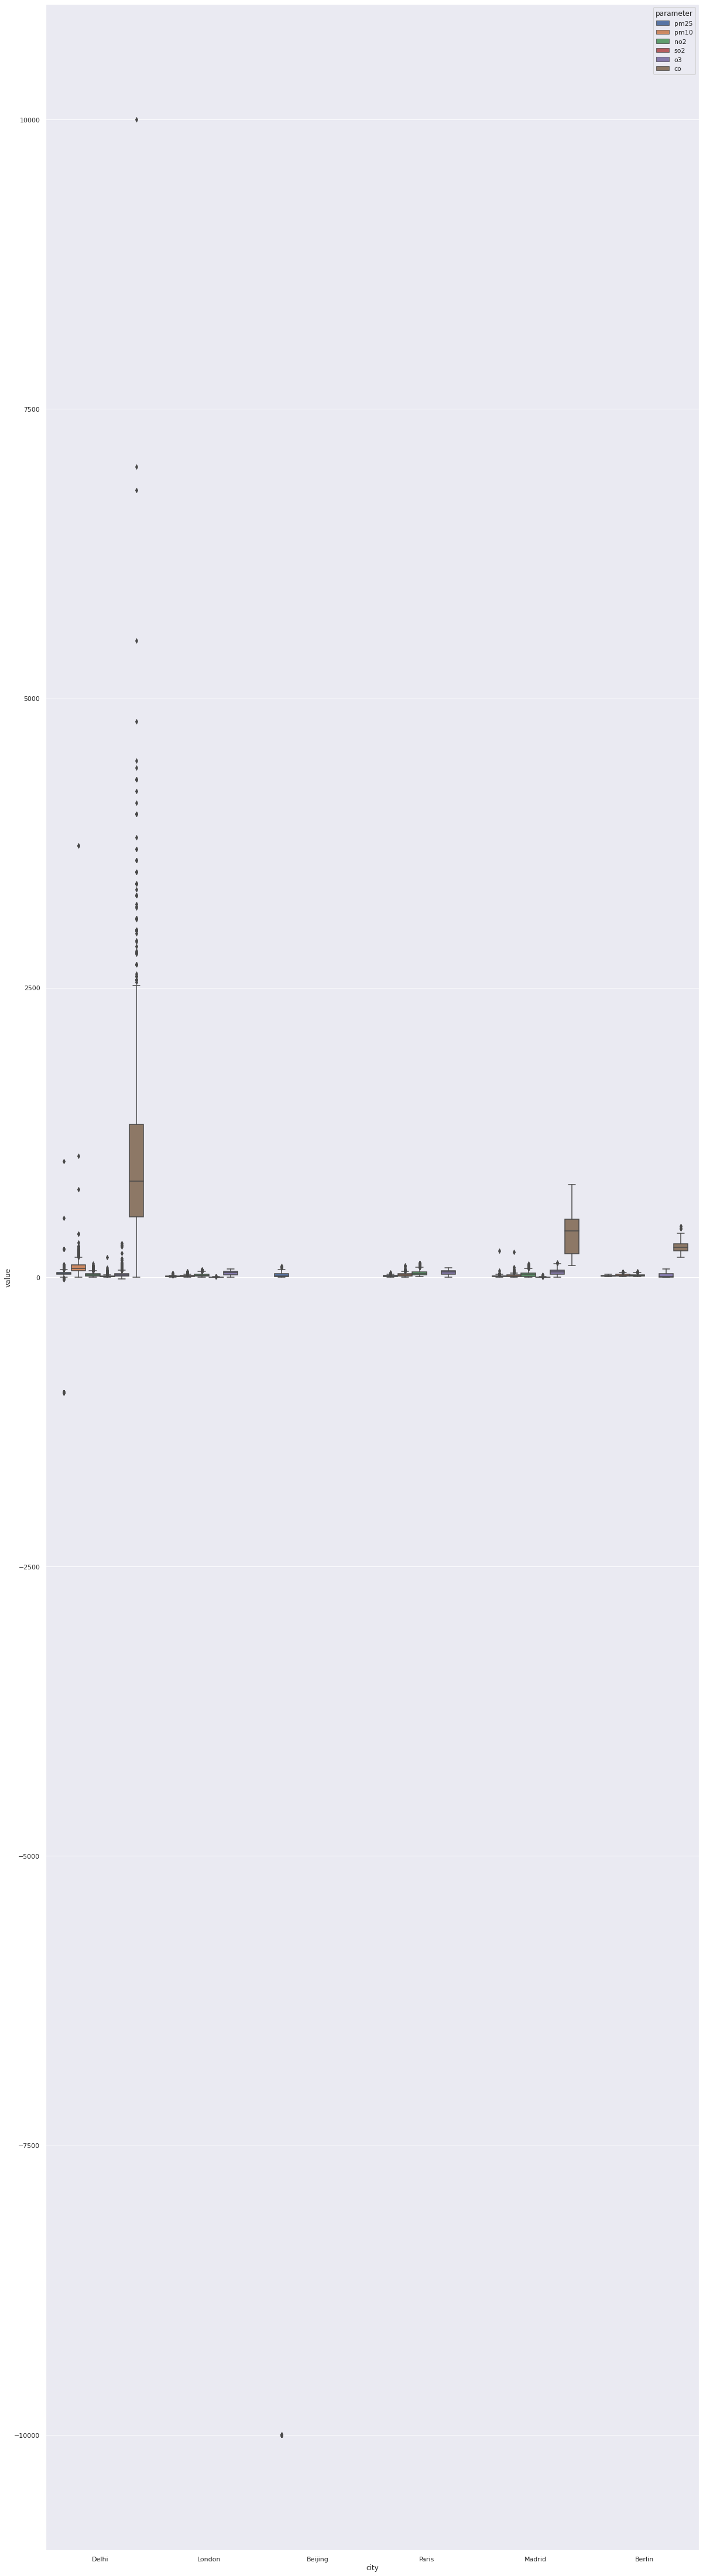

In [13]:
sns.set(rc={'figure.figsize':(20,80)})
sns.boxplot(x="city", y="value",
            hue="parameter", 
            data=airQualityCities)

In [14]:
Q2= airQualityCities.pivot_table(values='value', index=('city','parameter'))

In [15]:
Q2.reset_index().sort_values(by=[ 'parameter', 'value'])

,city,parameter,value
1,Berlin,co,267.555556
17,Madrid,co,360.816327
6,Delhi,co,984.832721
2,Berlin,no2,16.033369
12,London,no2,18.745915
7,Delhi,no2,21.598024
18,Madrid,no2,23.337947
23,Paris,no2,34.055988
3,Berlin,o3,14.868796
8,Delhi,o3,24.051291


In [16]:
Q21= airQualityCities.pivot_table(values='value', index='city').sort_values(by= 'value')
Q21

,value
city,
Beijing,-780.380000
London,19.402807
Berlin,25.593749
Paris,31.001098
Madrid,45.850196
Delhi,189.610243


In [17]:
Q21['rank'] = Q21['value'].rank(method='max')
Q21

,value,rank
city,,
Beijing,-780.380000,1.0
London,19.402807,2.0
Berlin,25.593749,3.0
Paris,31.001098,4.0
Madrid,45.850196,5.0
Delhi,189.610243,6.0


# We have 6 (six) cities London, Paris, Madrid, Delhi, Beijing, and Berlin. 
From the dataset, we should accept that some cities only take one or two tests. For example, Beijing did not give enough measurement parameters. The city only shows Particulate matter less than 2.5 micrometers in the atmosphere (pm25). The measurement also shows a minus value (-780.38 µg/m³). We should verify the data first before,  making a solid decision.  

In terms of Sulfur Dioxide concentration(so2), Particulate matter less than 2.5 micrometers(pm25), Particulate matter less than 10 micrometers (pm10), London, on average, reaches 1.596386 ppm, 7.069ppm, and 12.07 ppm which is the best result against the rest of the cities. The other parameter like Carbon Monoxide concentration(co), Nitrogen Dioxide concentration(no2), Ozone mass concentration(o3), Berlin record the best results as 267.5, 16.033, and 14.86 as well. Berlin did not give measurement at Sulfur Dioxide, and London did not disclose Carbon Monoxide concentration. From the dataset so far, Berlin and London, on average, shows all measurements and have good result compared to the other city. If I should choose one city, I would choose London because, in terms of CO,NO2, and O3, They have not far from the first position, Berlin. Moreover, if we calculate an average of all parameters we also get London in the First place.

## Question 3. Which location is the most poluted in London ?

In [18]:
LondonAQ=airQualityCities[airQualityCities['city']=='London']

In [19]:
Q3=LondonAQ.pivot_table(values='value', index=('location','parameter')).sort_values(by=['parameter','value'])
Q3

,,value
location,parameter,
London Eltham,no2,13.364259
Southend-on-Sea,no2,15.294985
London Haringey Priory Park South,no2,17.434932
London Harlington,no2,20.729642
Thurrock,no2,20.865192
Tower Hamlets Roadside,no2,24.288514
Thurrock,o3,30.346313
London Eltham,o3,33.454789
London Harlington,o3,36.493151


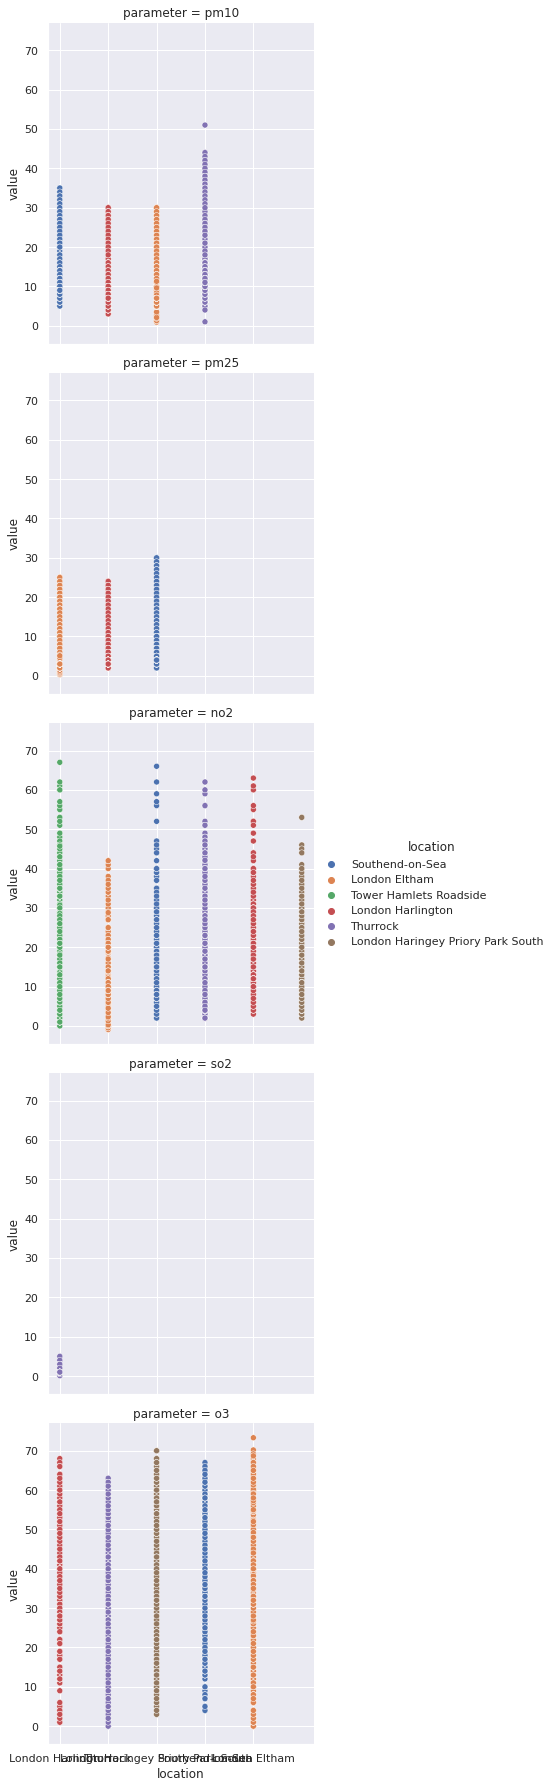

In [20]:
sns.relplot(x="location", y="value", 
            data=LondonAQ,
            kind="scatter", row="parameter", hue="location"
            )

In [21]:
Q31=LondonAQ.pivot_table(values='value', index=('location')).sort_values(by=['value'])
Q31

,value
location,
London Eltham,16.832881
Thurrock,17.024240
London Harlington,18.375527
Southend-on-Sea,18.670849
Tower Hamlets Roadside,24.288514
London Haringey Priory Park South,29.631161


In [22]:
LondonAQ.groupby("location")['value'].agg(['min','max',np.mean, np.median])

,min,max,mean,median
location,,,,
London Eltham,-0.9,73.3,16.832881,10.0
London Haringey Priory Park South,2.0,70.0,29.631161,26.0
London Harlington,1.0,68.0,18.375527,12.0
Southend-on-Sea,2.0,67.0,18.670849,11.0
Thurrock,0.0,63.0,17.024240,11.0
Tower Hamlets Roadside,0.0,67.0,24.288514,24.2


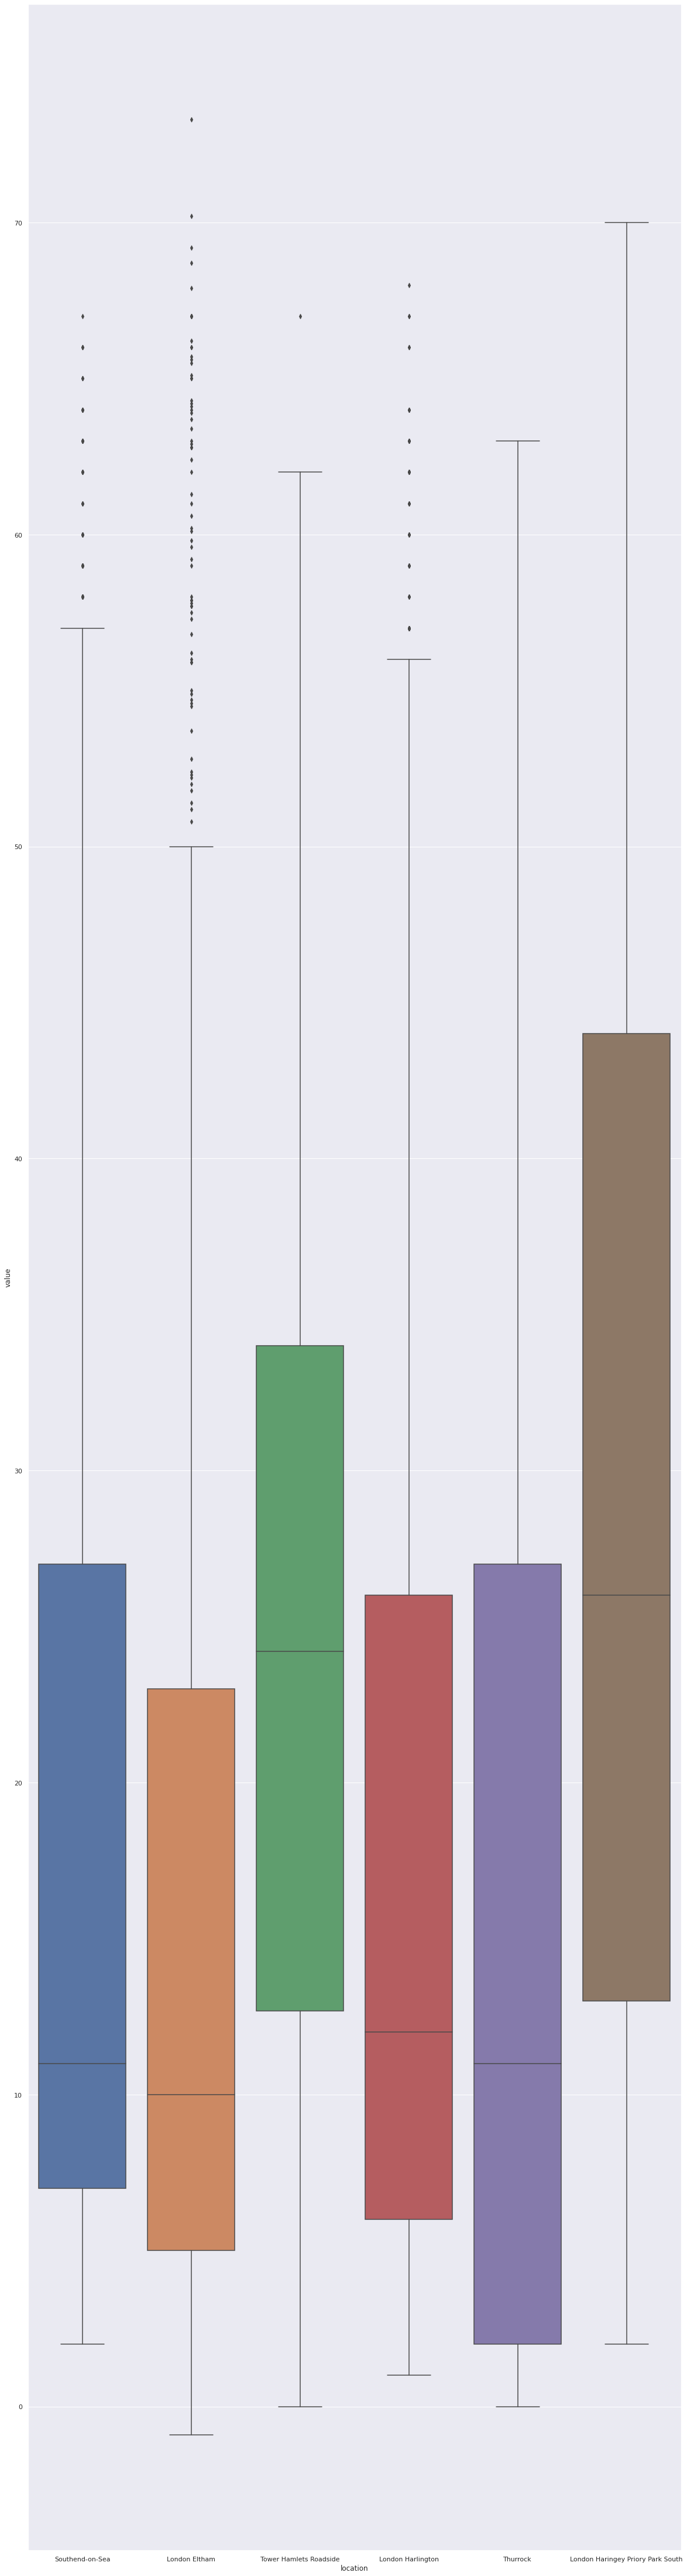

In [23]:
sns.boxplot(x="location", y="value",
                     data=LondonAQ)

In [24]:
Q31['rank'] = Q31['value'].rank(method='max')
Q31

,value,rank
location,,
London Eltham,16.832881,1.0
Thurrock,17.024240,2.0
London Harlington,18.375527,3.0
Southend-on-Sea,18.670849,4.0
Tower Hamlets Roadside,24.288514,5.0
London Haringey Priory Park South,29.631161,6.0


# Overall, London Haringey Priory Park South is the most polluted location in London.
We have some location candidates for the most polluted location in London.
In terms of no2, Tower Hamlets Roadside. In terms of o3, London Haringey Priory Park South.  In terms of pm10, Thurrock.  In terms of pm25, Southend-on-Sea. And only Thurrock gives measurement for So2.  



## Question 4. Plot the evolution of air polution accross time in locations in London
### Tip: Consider using Relplot: https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

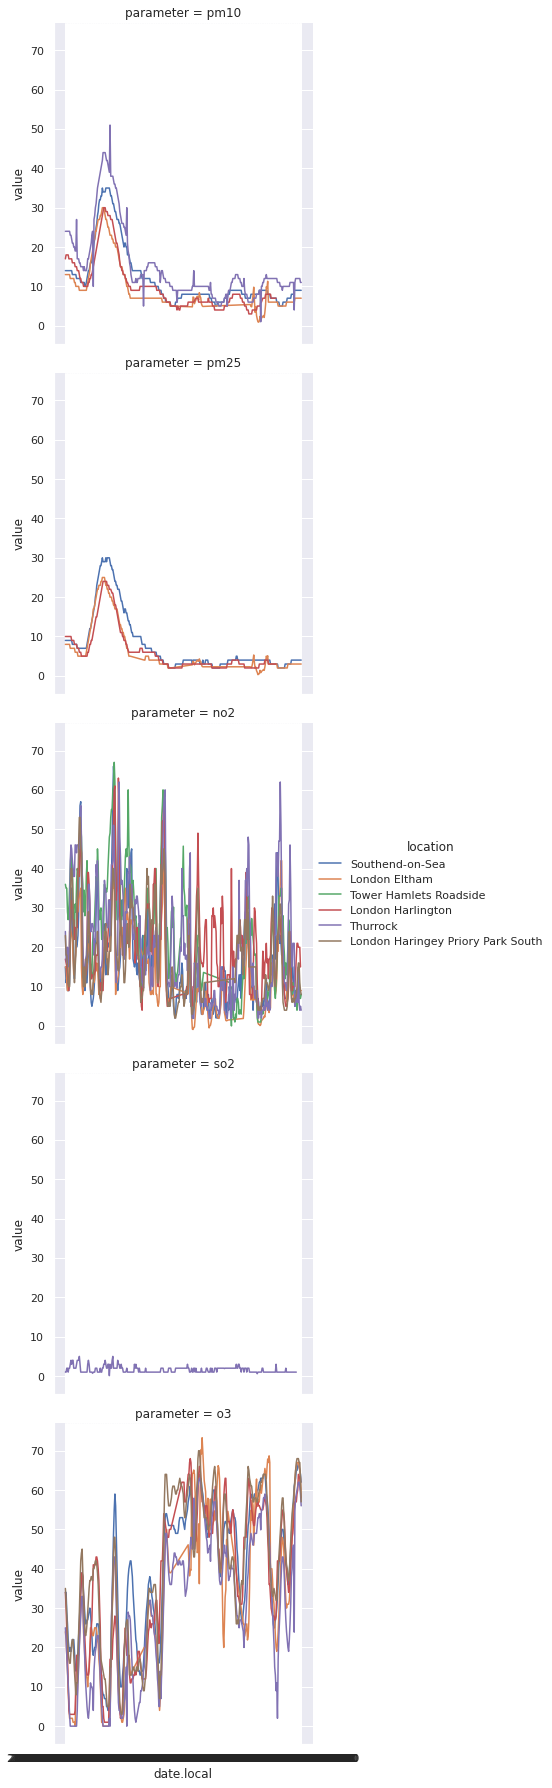

In [25]:
sns.set(rc={'figure.figsize':(10,50)})
sns.relplot(x="date.local", y="value", 
            data=LondonAQ,
            kind="line", row="parameter", hue="location"
            )

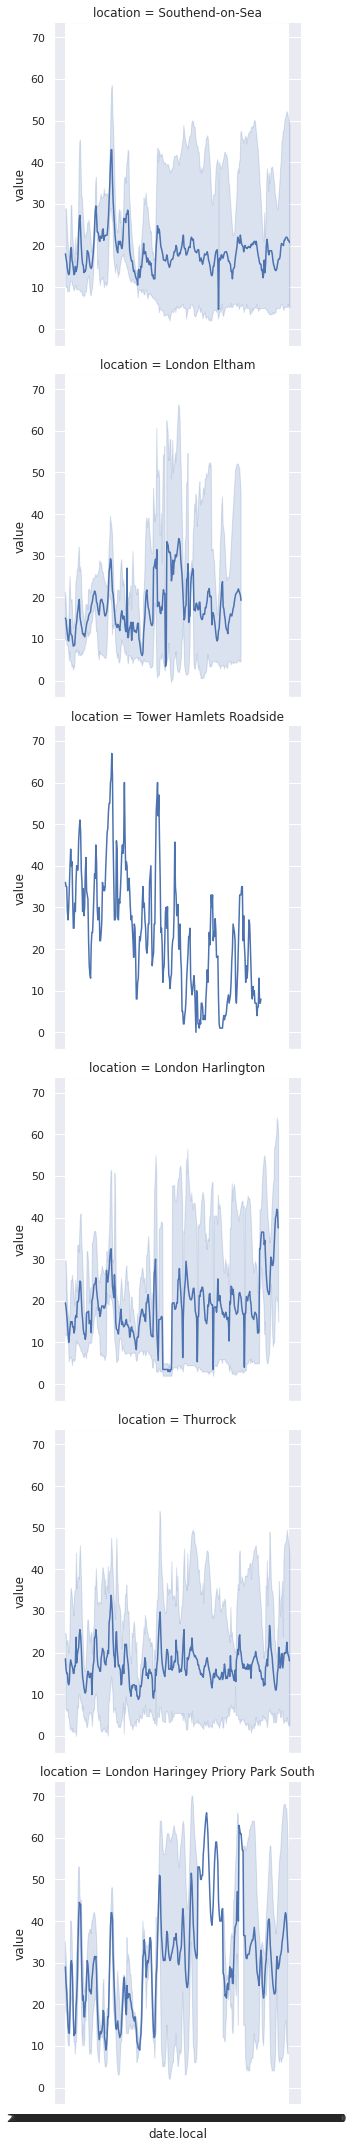

In [26]:
sns.relplot(x="date.local", y="value", 
            data=LondonAQ,
            kind="line", row="location"
            )

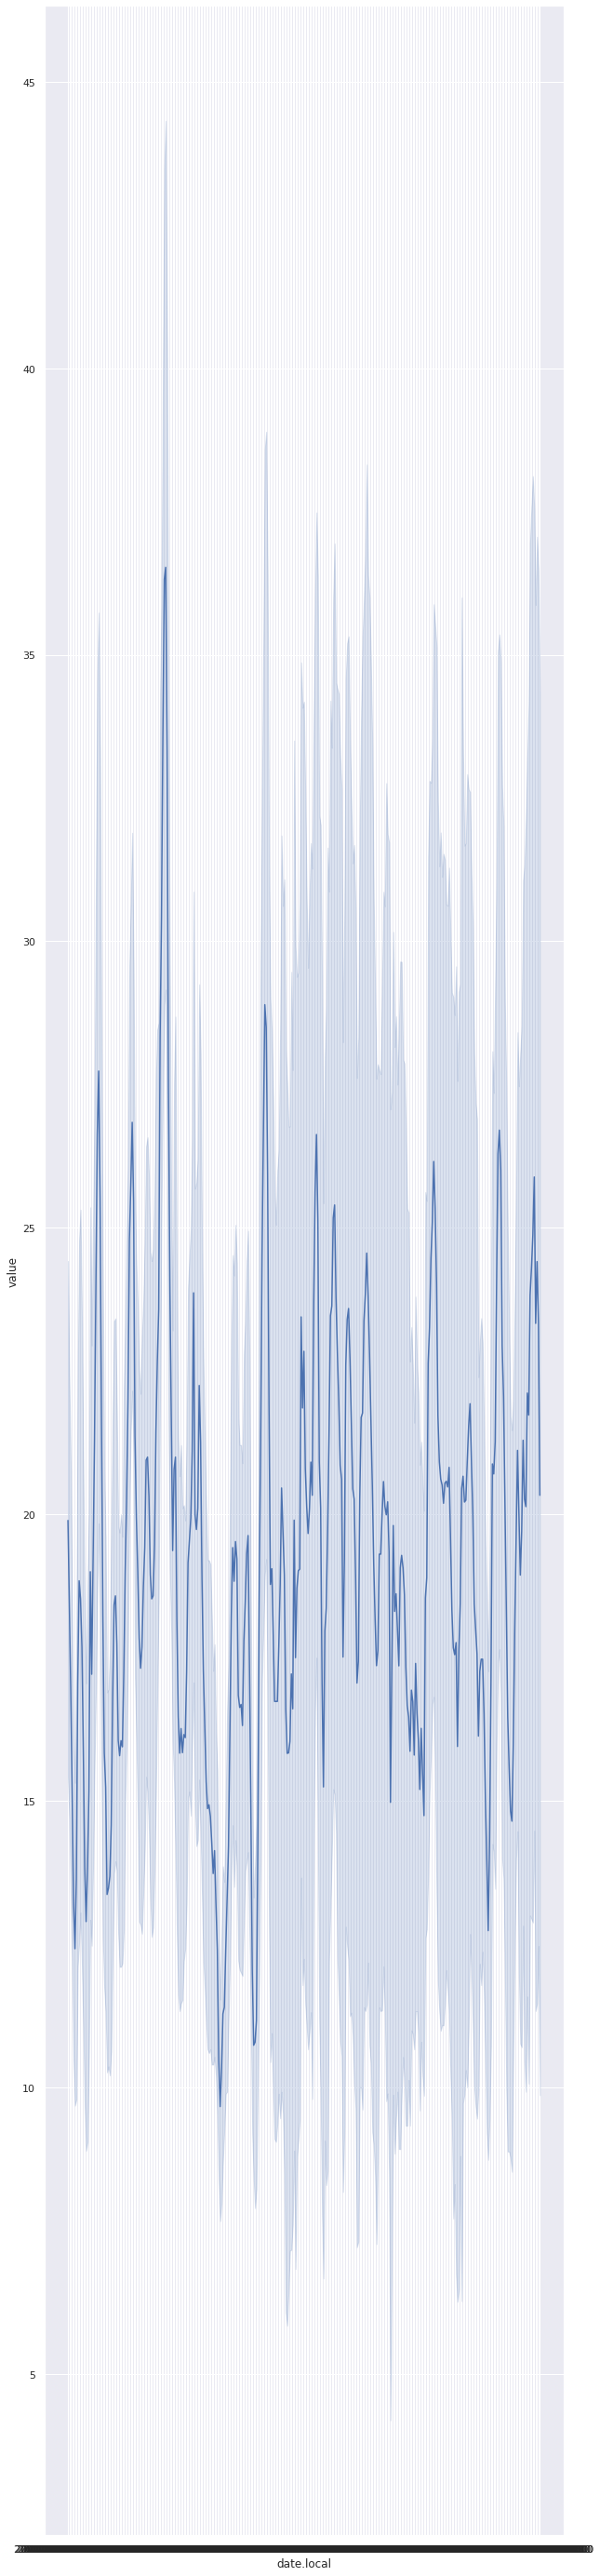

In [27]:

sns.lineplot(x="date.local", y="value", 
            data=LondonAQ
            )

# In general, The air condition in London is not much better than in the past. And variability of the pollution also increases in the recent dates.
London Harlington shows improvement, but Thurrock worsens in all parameters measured.
The evolution of air pollution across time and locations in London is stagnant, an element as CO2 remains at the same level as before. The pm25, ppm10, and no2. are slightly better. However, the increasing concentration of ozone in the past days.

## Question 5: Is there any relationship between levels of PM25 and PM10 in London?

In [28]:
### response: they are strongly correlated

In [29]:
LondonAQ.columns

Index(['date.local', 'location', 'parameter', 'value', 'unit', 'country',
       'city', 'date.utc', 'coordinates.latitude', 'coordinates.longitude'],
      dtype='object')

In [30]:
Q5 = LondonAQ.pivot_table(values='value', index=('date.local', 'location', 'unit', 'country','city', 'date.utc'), columns='parameter')

In [31]:
Q5.corr()

parameter,no2,o3,pm10,pm25,so2
parameter,,,,,
no2,1.000000,-0.410183,0.329872,0.259080,0.464537
o3,-0.410183,1.000000,-0.579475,-0.567922,-0.274694
pm10,0.329872,-0.579475,1.000000,0.989290,0.276201
pm25,0.259080,-0.567922,0.989290,1.000000,NaN
so2,0.464537,-0.274694,0.276201,NaN,1.000000


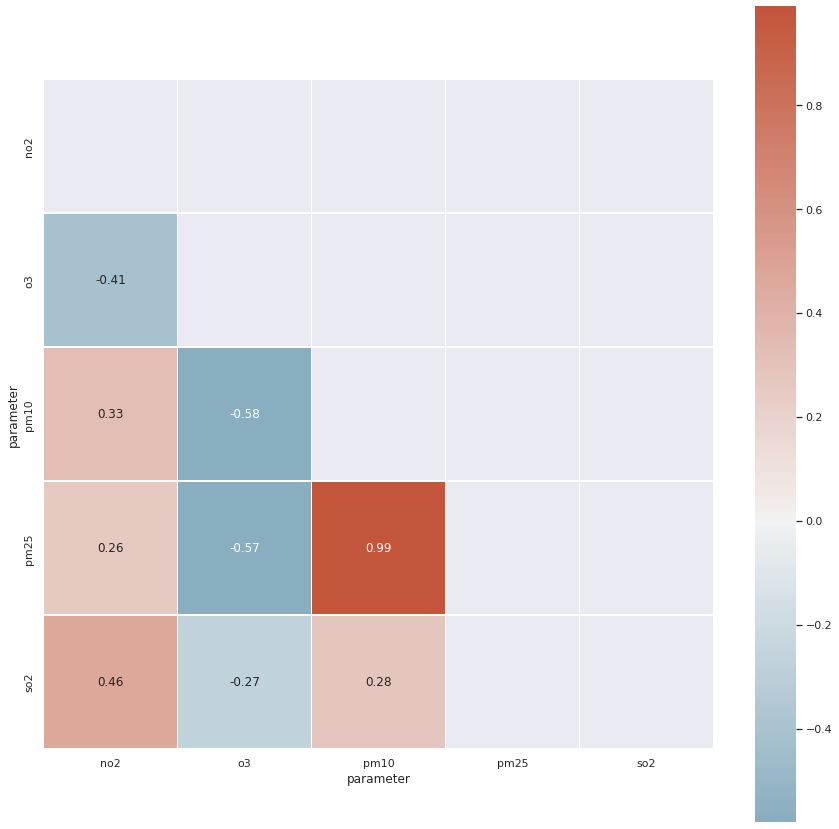

In [32]:
Q5_corr=Q5.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(Q5_corr, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(data=Q5_corr, mask=mask, cmap=cmap ,annot=True,center=0,square=True, linewidths=.5  )

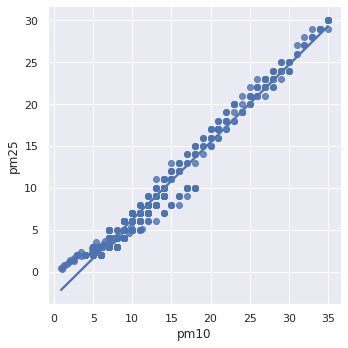

In [33]:
sns.lmplot(data=Q5, x='pm10', y='pm25')

# For the graphs above, We can conclude that  Particulate matter is less than 10 micrometers (pm10) and Particulate matter is less than 2.5 micrometers(pm25) in London positive and strong correlation. 
The correlation coefficient is about 0.989.